In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preparation


In [232]:
df = pd.read_csv("F:\Machine Learning\Machine Learning Projects\Machine Learning Bookcamp\Car Price Prediction Project\data\car_prices.csv")

In [233]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [234]:
df.shape

(11914, 16)

In [235]:
# make column names lowercase and have underscores(_) inplace of spaces


df.columns = df.columns.str.lower().str.replace(" " , "_")

# columns =[]
# for col in df.columns:
#     col = col.lower().replace(" " , "_")
#     columns.append(col)
# print(columns)

# df.columns = columns

In [236]:
#changing all the string values in the object dtype columns into lower case

strings = list(df.dtypes[df.dtypes =='object'].index)
#print(strings)

for col in strings:
    df[col]= df[col].str.lower().str.replace(" ","_")



# d  =df.select_dtypes(include='object')

# for col in d.columns:
#     df[col]= df[col].str.lower().str.replace(" ","_")

In [237]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory Data Analysis

In [238]:
for col in df.columns:
    print(col)
    #print(df[col].head())
    #print() 
    print(f"Unqiue values in {col} are: {df[col].unique()[:5]}") # printing only the first 5 unique values from the list
    print(f"The number of unique values in {col} are: {df[col].nunique()}")
    print() 
    

make
Unqiue values in make are: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
The number of unique values in make are: 48

model
Unqiue values in model are: ['1_series_m' '1_series' '100' '124_spider' '190-class']
The number of unique values in model are: 914

year
Unqiue values in year are: [2011 2012 2013 1992 1993]
The number of unique values in year are: 28

engine_fuel_type
Unqiue values in engine_fuel_type are: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
The number of unique values in engine_fuel_type are: 10

engine_hp
Unqiue values in engine_hp are: [335. 300. 230. 320. 172.]
The number of unique values in engine_hp are: 356

engine_cylinders
Unqiue values in engine_cylinders are: [ 6.  4.  5.  8. 12.]
The number of unique values in engine_cylinders are: 9

transmission_type
Unqiue values in transmission_type are: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
The number of uniqu

<AxesSubplot:xlabel='msrp', ylabel='Count'>

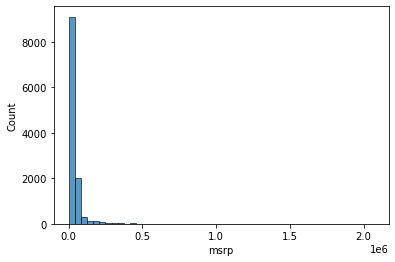

In [239]:
# Distribution of price

#sns.distplot(np.log(df['msrp'])) 

sns.histplot(df.msrp , bins = 50) #This plot is not much helpful as it does not show anything much and 1e6 means 10^6

<AxesSubplot:xlabel='msrp', ylabel='Count'>

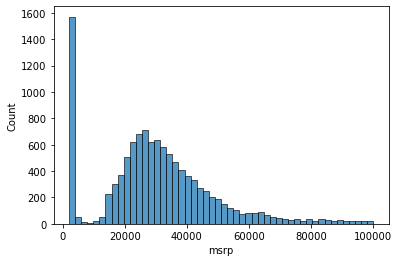

In [240]:
sns.histplot(df.msrp[df.msrp<100000], bins = 50)

In [241]:
# There is a long tail for price column and it confuses the machine learning models much so we need to scale it down 
# we will take the logarithm scale of the values because it gives smaller values
# Below we use np.log1p() function because since the values are closer to zero in the dataset we might get an error
# when we take log(0) which is infinity so we will use np.log1p() function from numpy which adds 1 to all the values 
print(np.log1p([0,1,10,100,1000,100000]))


[ 0.          0.69314718  2.39789527  4.61512052  6.90875478 11.51293546]


In [242]:
print(np.log([0+1,1+1,10+1,100+1,1000+1,100000+1])) #so insted of adding manually 1 to all the values we used np.log1p() above

[ 0.          0.69314718  2.39789527  4.61512052  6.90875478 11.51293546]


In [243]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

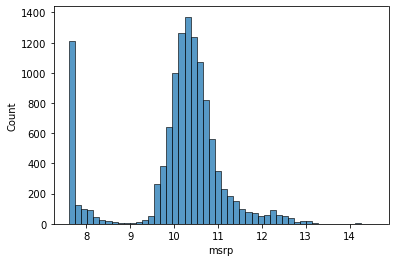

In [244]:
# The plot below shows something similar to the bell curve and the models learn better from data with this shape 

sns.histplot(price_logs, bins = 50)

In [245]:
#missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting Up Validation Framework

In [246]:
# n_train is used for training the model
# n_val is used to find the best model among the set of models 
# n_test is used only once on the best selected model

n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
#here we could use n_train = int(n*0.6) but when we sum n_val,n_test , n_train we get only 11912 rows because of
# rounding using the int  instead of actual 11914 rows 
n_train = n-n_val-n_test


In [247]:
n,n_val+n_test + n_train

(11914, 11914)

In [248]:
n_val , n_test , n_train

(2382, 2382, 7150)

In [249]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [250]:
# iloc is used for index based filtering df.iloc[[1,2,3,], [0,1,4]] -> 1,2,3 rows and make,year , engine_fuel_type columns 
df.iloc[[0,1,4,5], [1,2]]
#loc is used for label based indexing df.loc[[0,3,4],['make', 'year']] -> 0,3,4 rows and make , year columns 

,model,year
0,1_series_m,2011
1,1_series,2011
4,1_series,2011
5,1_series,2012


In [251]:
df.loc[[0,3,4],['make', 'year','model']]

,make,year,model
0,bmw,2011,1_series_m
3,bmw,2011,1_series
4,bmw,2011,1_series


In [252]:
#shuffling the data here because we will select the data continuosly and we don't want specific type of cars to be
# fallen in only validation , test , train set by using shuffling we randomly index the rows 
# which mean we will find only the bmw cars in df_val if we don't shuffle because BMW cars are first rows in the dataset 
data = df.sample(frac=1)

In [253]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4161,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624,79570
1893,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873,28115
11171,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,141495
8691,lexus,rx_450h,2016,premium_unleaded_(recommended),308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,28,30,454,53635
651,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,83600


In [254]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train:n_train + n_val]
df_test = data.iloc[n_train +n_val:]


#### other method for shuffling and selecting the data 

`idx = np.arange(n)` #this creates the list with n (11914) values in it 

`np.random.seed(42)`

`np.random.shuffle(idx)` # this one shuffles the list randomly

`df_train = df.iloc[idx[:n_train]]` # this one selects the values in the list starting from index n_train which is 7150

`df_val = df.iloc[idx[n_train:n_train + n_val]]`

`df_test = df.iloc[idx[n_train +n_val:]]`


In [255]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4161,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624,79570
1893,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873,28115
11171,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,141495
8691,lexus,rx_450h,2016,premium_unleaded_(recommended),308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,28,30,454,53635
651,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,83600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,bentley,continental_gt,2014,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,coupe,24,15,520,177500
10592,chevrolet,tracker,2004,regular_unleaded,165.0,6.0,automatic,four_wheel_drive,4.0,NaN,compact,4dr_suv,20,17,1385,22715
11642,scion,xd,2012,regular_unleaded,128.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,33,27,105,16145
7469,volkswagen,passat,2015,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,36,24,873,28105


In [256]:
len(df_train) , len(df_val) , len(df_test) 

(7150, 2382, 2382)

In [257]:
7150+2382+2382

11914

In [258]:
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

In [259]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624,79570
1,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873,28115
2,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,141495
3,lexus,rx_450h,2016,premium_unleaded_(recommended),308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,28,30,454,53635
4,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,83600


In [260]:
y_train = np.log1p(df_train.msrp.values)
y_test  = np.log1p(df_test.msrp.values)
y_val   = np.log1p(df_val.msrp.values)

In [261]:
y_train , y_test , y_val

(array([11.28440498, 10.24409409, 11.86002673, ...,  9.68942762,
        10.24373836, 10.56193976]),
 array([ 9.68009397, 10.39668877, 10.67466002, ..., 10.82538255,
         9.62845843, 10.59540898]),
 array([10.72702683, 10.78199334,  7.60140233, ..., 10.03924147,
        10.32551475, 10.34980665]))

In [262]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [263]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624
1,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873
2,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259
3,lexus,rx_450h,2016,premium_unleaded_(recommended),308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,28,30,454
4,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bentley,continental_gt,2014,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,coupe,24,15,520
7146,chevrolet,tracker,2004,regular_unleaded,165.0,6.0,automatic,four_wheel_drive,4.0,NaN,compact,4dr_suv,20,17,1385
7147,scion,xd,2012,regular_unleaded,128.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,33,27,105
7148,volkswagen,passat,2015,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,36,24,873


# Linear Regression 

In [264]:
df_train.iloc[10]

make                             honda
model                             hr-v
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        141.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category              crossover
vehicle_size                   compact
vehicle_style                  4dr_suv
highway_mpg                         35
city_mpg                            28
popularity                        2202
Name: 10, dtype: object

In [265]:
# we are taking a single instance of the dataset to explain it simply and out of all the variables we take only 
# the engine_hp , city_mpg , popularity columns to explain the linear regression model 
# because anything out of 3 dimensions is impossible to explain on a plain board
xi = [365 , 15 , 5657]

In [266]:
w0 = 0 # Y-intercept for the linear regression model
w = [1,1,1] # slopes or weights for the 3 variables 

In [267]:
"""
Alternative code for above linear regression Code from Machine Learning Bookcamp Course 

def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred
"""   
def linear_regression(xi):
    # y = w0 + w1.x1 + w2.x2 + w3.x3
    y = w0
    for i,j in zip(w,xi):
        y += i*j 
    
    return y 

In [268]:
linear_regression(xi)

6037

In [269]:
xi = [453 , 11,86 ]
linear_regression(xi)


550

In [270]:
w0 = 7.17 
w = [0.01 , 0.04 , 0.002]
linear_regression(xi)

12.312

In [271]:
# we need to take the exponent of the predicted values because we have take np.log1p() for the msrp values before 
# and in order to convert to the previous scale we have to use exponent of the predicted value
np.exp(12.312) # np.expm1(12.312) this one reduces 1 from the result because we added 1 during log1p 

222348.2221101062

In [272]:
np.log1p(222348.2221101062)

12.312004497439833

# Linear Regression Vector Form 

In [273]:
def dot(xi , w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res += xi[j]*w[j]
        
    return res

In [274]:
def linear_regression(xi):
    return w0+ dot(xi,w)


In [275]:
w_new = [w0] + w

In [276]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [277]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi , w_new)

In [278]:
linear_regression(xi)

12.312

In [279]:
w0 = 7.17
w = [0.01 , 0.04 , 0.002]
w_new = [w0] + w 

In [280]:
x1 =  [1,148,24,1385] # here 1 is added by us to multiply it with bias weight W0 , to make the formula vector form (dot product)
x2 =  [1,132,25,2031] 
x10 = [1,453,11,86]

X = [x1,x2 , x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [281]:
def linear_regression(X):
    return X.dot(w_new)

In [282]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

In [283]:
y_pred = linear_regression(X)
y_pred

array([12.38 , 13.552, 12.312])

In [284]:
np.expm1(y_pred)

array([237992.82334859, 768348.51018973, 222347.22211011])

# Training a Linear Regression Model 

In [285]:
def train_linear_regression(X,y):
    pass

In [286]:
 # here 1 is added by us to multiply it with bias weight W0 , to make the formula vector form (dot product)


X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [287]:
# we need to add the bias term as the column , it basically means that what is the prediction from the model if we know 
# nothing about the particular thing we are trying to predict.. 
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [288]:
X = np.column_stack([ones , X])

In [289]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [290]:
y = [10000,20000,15000,25000,10000,20000,15000,25000,12000]

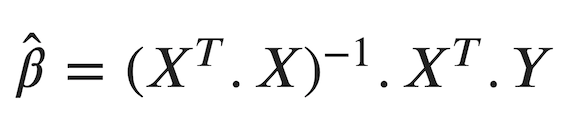

In [291]:
XTX = X.T.dot(X) # we are first taking Transpose of X and multiplying with X 

In [292]:
XTX_inv = np.linalg.inv(XTX) # Taking inverse of the XTX matrix 
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [293]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+04, -2.27742529e+01, -2.57694130e+02, -2.30120640e+00])

In [294]:
w0 = w_full[0] # the Bias term or the y-intercept where the line cuts the y axis and it also means what is the value if all
# values for X input is zero so we know what is the value at the value 0 for X 
w = w_full[1:]

In [295]:
w0 , w

(30006.77669255559, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [296]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [297]:
def train_linear_regression(X,y):
    #add ones to the given input feature matrix X as the first column with rows X.shape[0abs]
    ones = np.ones(X.shape[0])
    #add the ones created above to be the first column in the input feature matrix 
    X = np.column_stack([ones , X])
    # Take the dot product of Transpose of matrix X and X 
    XTX = X.T.dot(X)
    # Taking inverse of the XTX created above
    XTX_inv = np.linalg.inv(XTX)
    # multiplying inverse of XTX with Transpose of X and Y matrix 
    w_full = XTX_inv.dot(X.T).dot(y)
    # The Bias or Y-intercept term is the first one so w_full[0]
    w0 = w_full[0]
    # the remaining are the respective weights for the columns in the feature matrix 
    w = w_full[1:]
    
    return w0 , w



In [298]:
train_linear_regression(X,y)

LinAlgError: Singular matrix

# Car Price Baseline Model 

In [299]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [300]:
base = df_train.select_dtypes(include=['int64','float64']).columns
base

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [301]:
# we are considering only 5 columns out of 7 numerical columns 
base = ['engine_hp' , 'engine_cylinders', 'highway_mpg' , 'city_mpg' , 'popularity']

In [302]:
X_train = df_train[base].values

In [303]:
y_train

array([11.28440498, 10.24409409, 11.86002673, ...,  9.68942762,
       10.24373836, 10.56193976])

In [304]:
df_train[base].isnull().sum()

engine_hp           39
engine_cylinders    16
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [305]:
X_train = df_train[base].fillna(0) #we are simply filling with 0, we have to follow certain condition to fill missing values 
# here we are just filling it 0 becasuse we are just demonstrating how linear regression works  
# for example let's suppose there is a null value in age column we can't fill it with 0 because no body has age 0 
# and here in this case we have null values in engine_hp and car will never ever have 0 engine HP 
# so filling the null values with ZERO is a bad idea 

In [306]:
w0 , w = train_linear_regression(X_train , y_train)

In [307]:
# predicting using train_linear_regression

y_pred = w0+ X_train.dot(w)

In [308]:
y_pred 

0       11.248678
1       10.121691
2       11.346623
3       10.845505
4       10.740863
          ...    
7145    12.080189
7146     9.112672
7147     9.439137
7148     9.827699
7149    10.526384
Length: 7150, dtype: float64

<AxesSubplot:ylabel='Count'>

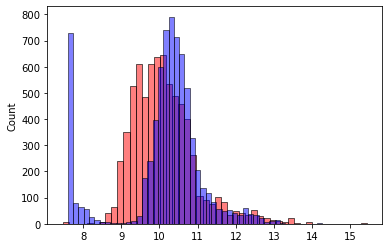

In [309]:
sns.histplot(y_pred, color ='red', alpha=0.5 ,bins =50)
sns.histplot(y_train , color='blue' , alpha =0.5 , bins = 50) 

# RMSE 

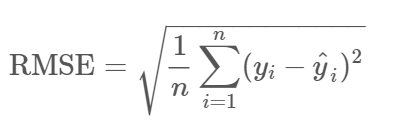



In [310]:
def rmse(y_pred , y_actual):
    mean_squared_error = (y_pred - y_actual)**2
    sum_of_mean_squared_error = sum(mean_squared_error)/ len(y_pred) # or mean_squared_error.mean()
    return np.sqrt(sum_of_mean_squared_error)

In [311]:
rmse(y_pred , y_train)

0.7455950646586569

# Validating the model 

In [312]:
base = ['engine_hp' , 'engine_cylinders', 'highway_mpg' , 'city_mpg' , 'popularity']

X_train = df_train[base].fillna(0).values

w0 , w = train_linear_regression(X_train , y_train)

y_pred = w0+ X_train.dot(w)

In [313]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [314]:

#Training the linear regression model on the training data to learn the weights
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)


#Here we are using the validation data to check how good the model is performing and by using this value we will select
# which model to choose from the models used and use that model to check on the test data 
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred)

0.7592848935575782

# Simple Feature Engineering 

In [315]:
df['age'] = 2017 - df.year

In [316]:
def prepare_X(df):
    df = df.copy() # we do not want to modify the original dataset
    df['age'] = 2017 - df.year
    features = base +['age'] # adding the new created age numerical column to the already contained int columns in base 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [317]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred)

0.5204932544339524

<AxesSubplot:ylabel='Count'>

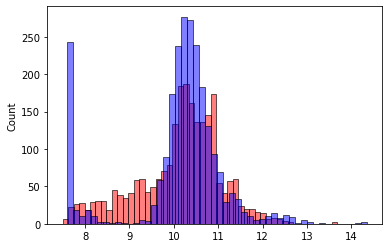

In [318]:
sns.histplot(y_pred, color ='red', alpha=0.5 ,bins =50)
sns.histplot(y_val , color='blue' , alpha =0.5 , bins = 50) 

# Categorical Variables 

In [319]:
df_train.number_of_doors.unique()

array([ 4.,  2.,  3., nan])

In [320]:
df_train['num_doors_2'] =(df_train.number_of_doors == 2).astype(int)
df_train['num_doors_3'] =(df_train.number_of_doors == 3).astype(int)
df_train['num_doors_4'] =(df_train.number_of_doors == 4).astype(int)


'''
for i in [2,3,4]:
    df_train['num_doors'+str(i)]  = (df_train.number_of_doors == i).astype(int)

'''

In [323]:
def prepare_X(df):
    df = df.copy() # we do not want to modify the original dataset
    features = base.copy() # we do not want to modify the original integer column list
    
    df['age'] = 2017 - df.year
    
    features.append('age') # adding the new created age numerical column to the already contained int columns in base
    
    for v  in [2,3,4]: # [2,3,4] are unique values in the number of doors column so we are encoding it to 0,1
        df['num_doors_%s'%v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s'%v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [324]:
prepare_X(df_train)

array([[420.,   8.,  21., ...,   0.,   0.,   1.],
       [210.,   4.,  31., ...,   1.,   0.,   0.],
       [430.,   8.,  21., ...,   1.,   0.,   0.],
       ...,
       [128.,   4.,  33., ...,   0.,   0.,   1.],
       [170.,   4.,  36., ...,   0.,   0.,   1.],
       [292.,   6.,  30., ...,   0.,   0.,   1.]])

In [325]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred)

0.5196531167829282

In [329]:
makes = list(df.make.value_counts().head().index) # we are only taking the top 5 most car make to encode the string values

makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [330]:
def prepare_X(df):
    df = df.copy() # we do not want to modify the original dataset
    features = base.copy() # we do not want to modify the original integer column list
    
    df['age'] = 2017 - df.year
    
    features.append('age') # adding the new created age numerical column to the already contained int columns in base
    
    for v  in [2,3,4]: # [2,3,4] are unique values in the number of doors column so we are encoding it to 0,1
        df['num_doors_%s'%v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s'%v)
        
    for v  in makes: # [2,3,4] are unique values in the number of doors column so we are encoding it to 0,1
        df['make_%s'%v] = (df.make == v).astype(int)
        features.append('make_%s'%v)    
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [331]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred)

0.5129460784502305

In [332]:
categorical_variables = ['make' , 'engine_fuel_type' , 'transmission_type' , 'driven_wheels' , 'market_category',
                        'vehicle_size' , 'vehicle_style']

In [333]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [334]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [337]:
def prepare_X(df):
    df = df.copy() # we do not want to modify the original dataset
    features = base.copy() # we do not want to modify the original integer column list
    
    df['age'] = 2017 - df.year
    
    features.append('age') # adding the new created age numerical column to the already contained int columns in base
    
    for v  in [2,3,4]: # [2,3,4] are unique values in the number of doors column so we are encoding it to 0,1
        df['num_doors_%s'%v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s'%v)
        
        
    for name, values  in categories.items():# [2,3,4] are unique values in the number of doors column so we are encoding it to 0,1
        for value in values:
            df['%s_%s'% (name,value)] = (df[name] == value).astype(int)
            features.append('%s_%s'% (name,value))    
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [339]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred) # after adding all the categorical varibles into the training we got a huge huge error for model which is 
# very bad and we need to find a way to generalize 

425.62671321915104

In [342]:
w0,w

(-5.614029125511567e+16,
 array([ 1.08192385e+00,  7.12487437e+01,  2.78586111e+01,  2.55350776e+01,
         2.43376092e-03,  1.91039424e+01,  1.93130615e+04,  1.95318375e+04,
         1.93135433e+04,  4.01427953e+00,  2.97535001e+01,  7.44471149e+01,
        -1.41666390e+00,  3.25176054e+01,  2.47784758e+01, -4.06575223e+01,
         1.78912572e+01,  2.24186785e+01, -2.28532500e+02,  2.29699708e+16,
         2.29699708e+16,  2.29699708e+16,  2.29699708e+16,  2.29699708e+16,
         3.31703205e+16,  3.31703205e+16,  3.31703205e+16,  3.31703205e+16,
         1.14952764e+02,  1.26438967e+01,  1.59868429e+01,  6.74159825e+00,
        -5.14606671e+01,  1.43790986e+02,  1.65281400e+02,  1.84856400e+02,
        -4.53217807e-02,  4.98469968e-02,  1.82667651e-01,  3.36191666e-01,
        -1.48080518e-01]))

# Regularization

In [343]:
# one of the reason why we got huge error in the above step might be because due to the gram matrix does not have the inverse 
# to calculate and the reason is maybe we have duplicate columns in the dataset 

# lets take an example to find out

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]

X = np.array(X) 

In [345]:
XTX = X.T.dot(X)

In [346]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [348]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000001],
]

X = np.array(X) 
X 

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [350]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [351]:
np.linalg.inv(XTX)

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

#### we add some value to the diagonal of the XTX matrix in cases like this to make the model more regularized 

In [352]:
def train_linear_regression_reg(X,y,r=0.001):
    #add ones to the given input feature matrix X as the first column with rows X.shape[0abs]
    ones = np.ones(X.shape[0])
    #add the ones created above to be the first column in the input feature matrix 
    X = np.column_stack([ones , X])
    # Take the dot product of Transpose of matrix X and X 
    XTX = X.T.dot(X)
    # REGULARIZATION
    XTX = XTX + r*np.eye(XTX.shape[0])
    # Taking inverse of the XTX created above
    XTX_inv = np.linalg.inv(XTX) 
    # multiplying inverse of XTX with Transpose of X and Y matrix 
    w_full = XTX_inv.dot(X.T).dot(y)
    # The Bias or Y-intercept term is the first one so w_full[0]
    w0 = w_full[0]
    # the remaining are the respective weights for the columns in the feature matrix 
    w = w_full[1:]
    
    return w0 , w


In [364]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression_reg(X_train , y_train)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val , y_pred)

0.46878344033169356

In [366]:
# The r value above affects the quality of the model
# we need to find the optimal r value to find the best model weights to the problem

for r in [0.0 , -0.001 , 0.001 , 0.01,10,100,300,3000,5000]:
    X_train = prepare_X(df_train)
    w0 , w = train_linear_regression_reg(X_train , y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)

    print(f"RMSE with r={r} is {rmse(y_val , y_pred)}")

RMSE with r=0.0 is 425.62671321915104
RMSE with r=-0.001 is 0.4687819555146199
RMSE with r=0.001 is 0.46878344033169356
RMSE with r=0.01 is 0.4687902538175748
RMSE with r=10 is 0.48475404935611205
RMSE with r=100 is 0.5909436580282609
RMSE with r=300 is 0.7323115676409196
RMSE with r=3000 is 1.0839111721038404
RMSE with r=5000 is 1.1540746020816017


# Tuning the model 

In [369]:
for r in [0.0 , 0.00001 , 0.0001 , 0.001 , 0.1 ,1 ,10]:
    X_train = prepare_X(df_train)
    w0 , w = train_linear_regression_reg(X_train , y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w)

    print(f"RMSE with r={r} and {w0} is {rmse(y_val , y_pred)}") # the more the w0 score the worst the model is here 

RMSE with r=0.0 and -5.614029125511567e+16 is 425.62671321915104
RMSE with r=1e-05 and 7.421544305947021 is 0.468782711630024
RMSE with r=0.0001 and 6.312780707053289 is 0.4687827717802419
RMSE with r=0.001 and 6.268720848776871 is 0.46878344033169356
RMSE with r=0.1 and 6.162771762816413 is 0.4688687995173272
RMSE with r=1 and 5.574894387709764 is 0.47004650451254576
RMSE with r=10 and 4.245756410207984 is 0.48475404935611205


In [370]:
# we feel r=0.001 is the best regularization value for this model so we train linear regression with r =0.001 
X_train = prepare_X(df_train)
w0 , w = train_linear_regression_reg(X_train , y_train, r =0.001)

X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

score = rmse(y_val , y_pred)
score 

0.46878344033169356

# Using the model

In [371]:
# Till now we are training the model with train dataset 
# and validating the model performance using the validation dataset
# now we will combine the both training and validation dataset and then use the model to test on testing dataset 

df_full_train = pd.concat([df_train ,df_val])

In [373]:
df_full_train.shape

(9532, 18)

In [374]:
df_full_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624,0.0,0.0,1.0
1,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873,1.0,0.0,0.0
2,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,1.0,0.0,0.0
3,lexus,rx_450h,2016,premium_unleaded_(recommended),308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,hybrid",midsize,4dr_suv,28,30,454,0.0,0.0,1.0
4,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,impala_limited,2016,flex-fuel_(unleaded/e85),300.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,30,18,1385,NaN,NaN,NaN
9528,bmw,4_series,2017,premium_unleaded_(recommended),320.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,29,21,3916,NaN,NaN,NaN
9529,mitsubishi,montero_sport,2003,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,436,NaN,NaN,NaN
9530,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,NaN,NaN,NaN


In [375]:
X_full_train = prepare_X(df_full_train)

In [376]:
X_full_train

array([[420.,   8.,  21., ...,   0.,   0.,   0.],
       [210.,   4.,  31., ...,   0.,   0.,   0.],
       [430.,   8.,  21., ...,   0.,   1.,   0.],
       ...,
       [165.,   6.,  21., ...,   0.,   0.,   0.],
       [170.,   4.,  34., ...,   0.,   1.,   0.],
       [134.,   4.,  40., ...,   0.,   0.,   1.]])

In [378]:
y_full_train= np.concatenate([y_train , y_val])

In [379]:
w0 , w = train_linear_regression_reg(X_full_train , y_full_train, r =0.001)

In [380]:
w0,w

(6.319427376979941,
 array([ 1.55367248e-03,  1.17531868e-01, -6.80828554e-03, -7.48629632e-03,
        -5.35821011e-05, -9.66365243e-02, -6.87061982e-01, -8.25555152e-01,
        -5.51062715e-01, -4.17736520e-02,  1.81822712e-01,  1.59218097e-03,
        -9.28323241e-02, -1.17362441e-01, -4.34472725e-01,  1.15323773e-01,
        -2.91801422e-01, -5.12843599e-01, -4.23340124e-02,  1.02382198e+00,
         8.44544613e-01,  1.10188547e+00,  2.87970277e+00,  4.66147118e-01,
         1.63661373e+00,  1.52528062e+00,  1.61921126e+00,  1.53849208e+00,
        -7.20040265e-02,  5.48134979e-02, -4.57828693e-02, -1.47060410e-02,
        -2.72825376e-02,  2.18690866e+00,  2.06639834e+00,  2.06569178e+00,
        -4.08231643e-02,  4.39149529e-02,  1.77444269e-01,  3.14759068e-01,
        -1.39181937e-01]))

In [381]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)

score = rmse(y_test , y_pred)
score 

0.4524074303560923

In [382]:
car = df_test.iloc[20].to_dict()
car

{'make': 'hyundai',
 'model': 'elantra_touring',
 'year': 2012,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 138.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'hatchback',
 'vehicle_size': 'compact',
 'vehicle_style': '4dr_hatchback',
 'highway_mpg': 30,
 'city_mpg': 23,
 'popularity': 1439}

In [385]:
df_small = pd.DataFrame([car]) 
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,hyundai,elantra_touring,2012,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,30,23,1439


In [388]:
# we have to give the prepare_X function only the  dataframe because we have written it that way and hence that's why 
# we are performing the above conversion of dict to dataframe for testing the sample 

X_small = prepare_X(df_small)
y_pred = w0+X_small.dot(w) 
y_pred # the value that comes out of this is the logarithm of the original value so if we take exponent we get original value

array([9.76258545])

In [389]:
np.expm1(y_pred)

array([17370.4868072])

In [391]:
# actual price of the sample we test
y_test[20] 

# we got 9.91 instead of 9.76 which is very good 

9.918179101279117

In [393]:
np.expm1(y_test[20]) # original price 

20294.99999999998

In [394]:
np.expm1(y_pred) # predicted price  

array([17370.4868072])